Visualizing a Linear Transformation

Define a Grid of Vectors:

In [44]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-3, 3, 25)
y_vals = np.linspace(-3, 3, 25)
X, Y = np.meshgrid(x_vals, y_vals)

grid = np.vstack([X.ravel(), Y.ravel()])    # each column is a vector


Define a Transformation Matrix:

In [45]:
# combining rotation + scaling

theta = np.deg2rad(30)   # rotate by 30 degrees
scale = 1.5              # scale factor
T = scale * np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta),  np.cos(theta)]])

Perform Transformation:

In [46]:
grid_transformed = T @ grid
print(grid_transformed)

[[-1.64711432 -1.32235479 -0.99759526 ...  0.99759526  1.32235479
   1.64711432]
 [-6.14711432 -5.95961432 -5.77211432 ...  5.77211432  5.95961432
   6.14711432]]


Visualize original and transformed

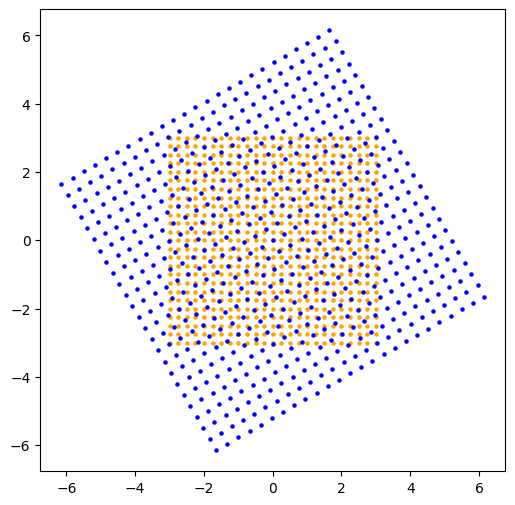

In [47]:
plt.figure(figsize=(6,6))
plt.scatter(grid[0,:], grid[1,:], color='orange', label='Original grid', s=5)
plt.scatter(grid_transformed[0,:], grid_transformed[1,:], color='blue', label='Transformed grid', s=5)



Find eigenvalues | eigenvectors

In [48]:
eigvals, eigvecs = np.linalg.eig(T)

Visualize Eigenvectors:

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15260\1094820737.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  vx, vy = float(v[0]), float(v[1])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15260\1094820737.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  x_end, y_end = float(λ * v[0]), float(λ * v[1])


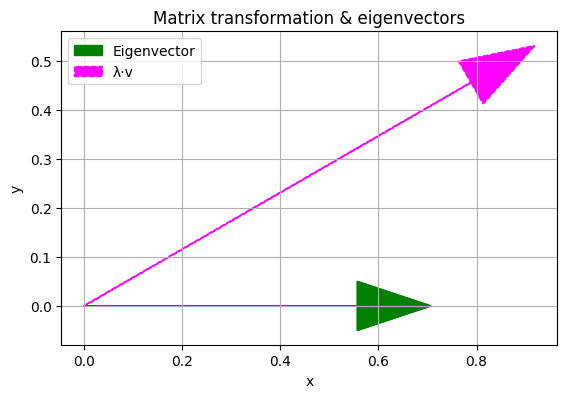

In [49]:
ax = plt.gca()
for i in range(len(eigvals)):
    v = eigvecs[:, i]
    λ = eigvals[i]
    # Ensure numeric floats for arrow endpoints
    vx, vy = float(v[0]), float(v[1])
    x_end, y_end = float(λ * v[0]), float(λ * v[1])
    # Arrow for eigenvector direction
    ax.arrow(0, 0, vx, vy, head_width=0.1, head_length=0.15, 
             length_includes_head=True, color='green', label='Eigenvector' if i==0 else "")
    # Arrow for its transformed version
    ax.arrow(0, 0, x_end, y_end, head_width=0.1, head_length=0.15,
             length_includes_head=True, color='magenta', linestyle='--', label='λ·v' if i==0 else "")

ax.set_aspect('equal', 'box')
ax.legend()
ax.set_title('Matrix transformation & eigenvectors')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()